<a href="https://colab.research.google.com/github/ftkbyond77/Deeplearning_CNN1/blob/main/MNIST_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch with MNIST

## 1. Library

In [3]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

# Check
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Torch version {torch.__version__}')
print(f'Using device {device}')

Torch version 2.6.0+cu124
Using device cuda


In [33]:
!nvidia-smi

Thu Mar 20 21:19:55 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   76C    P0             34W /   70W |     322MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [34]:
torch.cuda.is_available()

True

## 1. Datasets

MNIST

In [4]:
train_dataset = torchvision.datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_dataset = torchvision.datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 500kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.54MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.63MB/s]


In [5]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [6]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [7]:
class_names = train_dataset.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [8]:
class_idx = train_dataset.class_to_idx
class_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

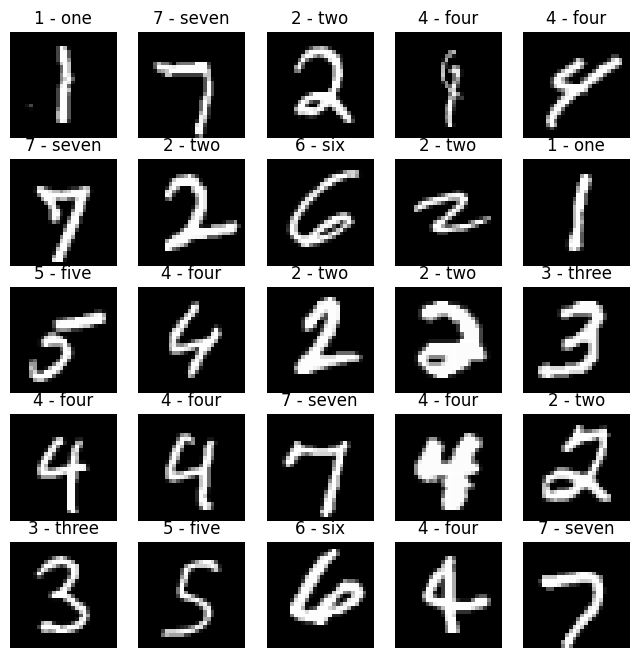

In [9]:
fig = plt.figure(figsize=(8, 8))
r, c = 5, 5
for i in range(1, r*c+1):
  random_idx = torch.randint(0, len(train_dataset), size=[1]).item()
  img, label = train_dataset[random_idx]
  fig.add_subplot(r, c, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis('off')

## 2. Prepare Data Loader

In [10]:
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [11]:
print(f' Length {len(train_dataset)} batches size of {batch_size}')
print(f' Length {len(test_dataset)} batches size of {batch_size}')

 Length 60000 batches size of 64
 Length 10000 batches size of 64


## 3. Prepare Model

In [12]:
class mnistCNN1(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
    self.dens1 = nn.Linear(64 * 14 * 14, 128)
    self.dens2 = nn.Linear(128, 10)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

  def forward(self, x):
    x = torch.relu(self.conv1(x))
    x = self.pool(torch.relu(self.conv2(x)))
    print(x.shape)
    x = x.view(x.size(0), -1)  # Flatten
    x = torch.relu(self.dens1(x))
    x = self.dens2(x)
    return x

In [13]:
model_1 = mnistCNN1().to(device)
model_1

mnistCNN1(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dens1): Linear(in_features=12544, out_features=128, bias=True)
  (dens2): Linear(in_features=128, out_features=10, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

### 3.1 Setup Loss and Optimizer

In [14]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001)

### 3.2 Time for measure experiment

In [15]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

## 4. Model Train

In [32]:
from tqdm.auto import tqdm

train_losses = []
test_losses = []
epoch_count = []

torch.manual_seed(42)
print_train_time_on_cpu = timer()
epochs = 5

for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n------')
  # Training
  model_1.train()
  train_loss = 0
  for batch, (X, y) in enumerate(train_loader):
    X, y = X.to(device), y.to(device)

    # Forward
    y_pred = model_1(X)
    loss = loss_fn(y_pred, y)

    # Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss += loss.item()

    if batch % 100 == 0:
      print(f'At {batch * len(X)}/{len(train_loader.dataset)} samples.')

  train_loss /= len(train_loader)
  train_losses.append(train_loss)

  # Testing
  model_1.eval()
  correct = 0
  total = 0
  test_loss = 0
  with torch.inference_mode():
    for X_test, y_test in test_loader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = model_1(X_test)
      loss = loss_fn(test_pred, y_test)
      test_loss += loss.item()

      _, predicted = torch.max(test_pred, 1)
      total += y_test.size(0)
      correct += (predicted == y_test).sum().item()

  test_loss /= len(test_loader)
  test_losses.append(test_loss)

  print(f'\nTrain loss: {train_loss:.4f} | Test loss: {loss:.4f}, Test acc: {100 * correct / total}')
  epoch_count.append(epoch+1)

train_time_end_on_cpu = timer()
total_train_time_model_1 = train_time_end_on_cpu - print_train_time_on_cpu
print(f"Training time on {str(next(model_1.parameters()).device)}: {total_train_time_model_1:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64, 64, 14, 14])
torch.Size([64,

### 4.1 Model Evaluated

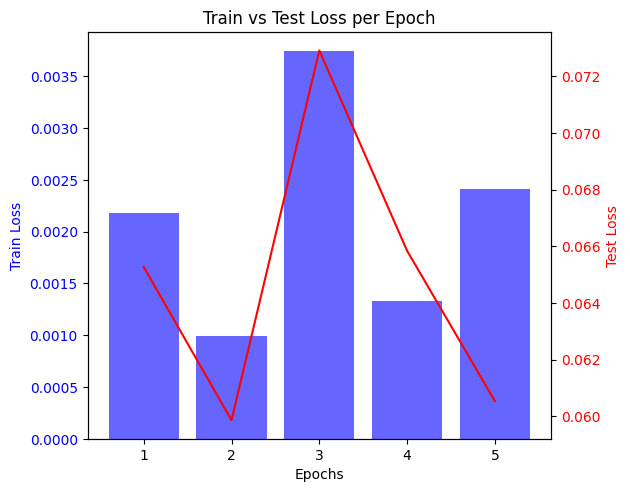

In [40]:
fig, ax1 = plt.subplots()

# Plotting train loss as bars
ax1.bar(epoch_count, train_losses, color='b', alpha=0.6, label="Train Loss")
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Train Loss', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()  # Create a second y-axis
ax2.plot(epoch_count, test_losses, color='r', label="Test Loss")
ax2.set_ylabel('Test Loss', color='r')
ax2.tick_params(axis='y', labelcolor='r')

fig.tight_layout()  # Adjust layout to avoid overlap
plt.title('Train vs Test Loss per Epoch')
plt.show()

## 5. Testing Model

torch.Size([10, 64, 14, 14])


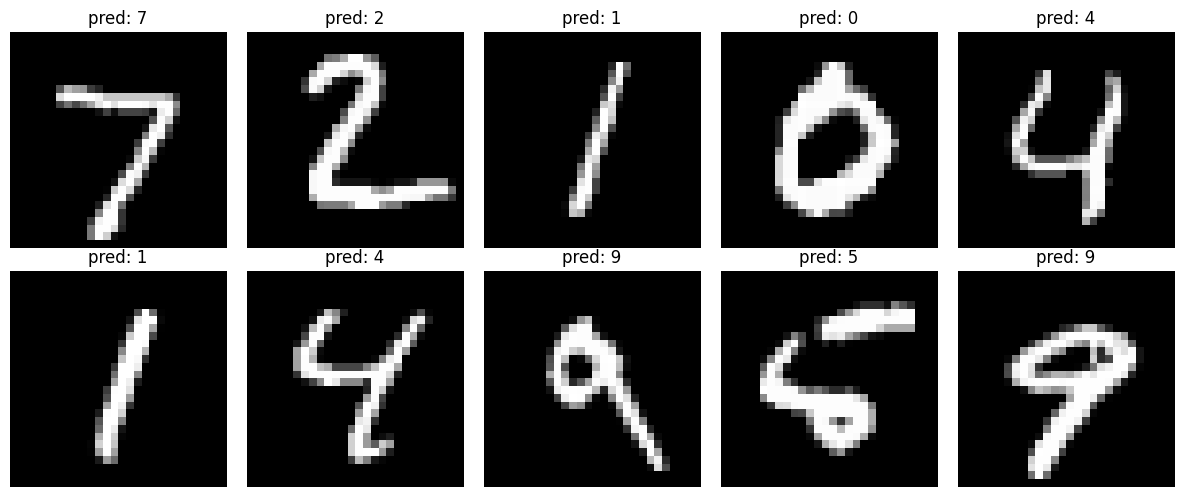

In [24]:
import numpy as np

images, labels = next(iter(test_loader))
images, labels = images[:10].to(device), labels[:10].to(device)

outputs = model_1(images)
_, preds = torch.max(outputs, 1)

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.flatten()

for i in range(10):
  img = images[i].cpu().numpy().squeeze()
  axes[i].imshow(img, cmap='gray')
  axes[i].set_title(f'pred: {preds[i].item()}')
  axes[i].axis('off')

plt.tight_layout()
plt.show()